In [41]:
import pandas as pd
import numpy as np
import pickle
from sklearn import linear_model

In [42]:
#loading and separating our sensor dataset into labels and features
data = pd.read_csv('../data/containerData.csv', delimiter=",")
data.head()


,Timestamp,ID,Temperature(celsius),Target_Temperature(celsius),Amp,CumulativePowerConsumption,ContentType,Humidity,CO2,Door_Open,Maintainence_Required,Defrost_Cycle
0,2019-03-19 T15:50 Z,1739,1.166314,4.4,3.292374,11.506573,3,8.869222,7.495099,0,1,6
1,2019-03-19 T16:05 Z,1739,3.979301,4.4,2.942407,11.727594,4,-2.336991,-3.540896,0,1,6
2,2019-03-19 T16:20 Z,1739,1.070377,4.4,2.409779,8.050487,1,10.142936,15.937540,0,1,6
3,2019-03-19 T16:35 Z,1739,9.552380,4.4,3.940449,8.882198,2,13.710208,3.214708,0,1,6
4,2019-03-19 T16:50 Z,1739,7.927455,4.4,3.790703,12.315440,3,1.539946,17.381030,0,1,6


In [43]:
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline




/anaconda2/lib/python2.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


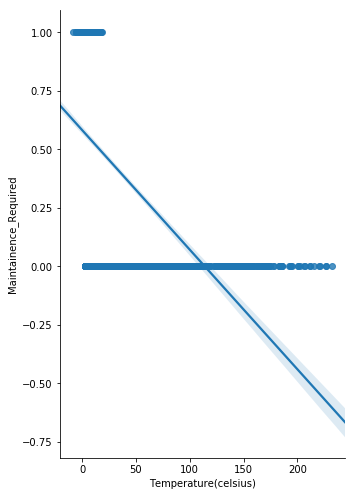

In [44]:
sns.pairplot(data, x_vars=['Temperature(celsius)'], y_vars='Maintainence_Required', size=7, aspect=0.7, kind='reg')









In [45]:
# create a Python list of feature names
#feature_cols = ['Temperature(celsius)','CumulativePowerConsumption','Humidity']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

#X = data[['Temperature(celsius)', 'Door_Open','Target_Temperature(celsius)','Amp','ContentType','CumulativePowerConsumption'
                         # ,'Humidity','CO2','Defrost_Cycle']]

# print the first 5 rows


,Temperature(celsius),CumulativePowerConsumption,Humidity
0,1.166314,11.506573,8.869222
1,3.979301,11.727594,-2.336991
2,1.070377,8.050487,10.142936
3,9.552380,8.882198,13.710208
4,7.927455,12.315440,1.539946


In [46]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(4000, 3)


In [47]:
# select a Series from the DataFrame
y = data['Maintainence_Required']

# equivalent command that works if there are no spaces in the column name
# you can select the Sales as an attribute of the DataFrame
y = data.Maintainence_Required

# print the first 5 values
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Maintainence_Required, dtype: int64

In [48]:
# import  
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [58]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

X_test

(3000, 3)
(1000, 3)
(3000,)
(1000,)


,Temperature(celsius),CumulativePowerConsumption,Humidity
200,8.192211,8.904516,13.726063
1078,4.150778,12.381084,8.670916
610,0.347683,8.843529,-0.516207
2159,4.171429,12.116547,16.320897
1169,8.293859,12.074628,17.497562
2448,3.397775,12.561537,7.859626
2938,4.673765,6.505958,9.628485
813,10.330016,11.462098,6.585873
1268,12.977098,8.640423,3.118054
870,5.998788,11.461666,7.065768


In [50]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)


#serializing our model to a file called model.pkl
pickle.dump(linreg, open("model.pkl","wb"))



In [51]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

0.6181085731252802
[-0.00510317 -0.00087029 -0.00226434]


In [52]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)


In [53]:
y_pred.shape

(1000,)

In [54]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


0.4716402753397067


In [55]:
X_test

,Temperature(celsius),CumulativePowerConsumption,Humidity
200,8.192211,8.904516,13.726063
1078,4.150778,12.381084,8.670916
610,0.347683,8.843529,-0.516207
2159,4.171429,12.116547,16.320897
1169,8.293859,12.074628,17.497562
2448,3.397775,12.561537,7.859626
2938,4.673765,6.505958,9.628485
813,10.330016,11.462098,6.585873
1268,12.977098,8.640423,3.118054
870,5.998788,11.461666,7.065768
